In [1]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
from skimage.io import imshow
import numpy as np
import tensorflow as tf
import os
import PIL
import PIL.Image

ModuleNotFoundError: No module named 'tensorflow'

In [11]:
path = './images/'#give path of the dataset direcorty

In [12]:
train_datagen = ImageDataGenerator(rescale=1./ 255)# declaration of normalization  factor on the dataset

In [ ]:
train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=340, 
                                          class_mode=None)

In [18]:

def SetDataX =[]
Y =[]
for img in train[0]:
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0]) 
        Y.append(lab[:,:,1:] / 128)  
    except:
            print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)


(340, 256, 256, 1)
(340, 256, 256, 2)


Found 678 images belonging to 19 classes.


In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1))
          
model.add(Conv2D(128, (3, 3),activation='relu', padding='same'))
          
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
          
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
          
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
          
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))

          
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))  
                  
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
          
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))

model.add(Conv2D(16, (3,3), activation='relu', padding='same'))

model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 512)      

In [9]:
model.fit(X,Y,validation_split=0.15, epochs=300, batch_size=16)

model.save('other_files/colorize_autoencoder_S4.model')

Epoch 1/300
19/19 [==============================] - 87s 5s/step - loss: 0.0928 - accuracy: 0.5771 - val_loss: 0.0231 - val_accuracy: 0.7025
Epoch 2/300
19/19 [==============================] - 89s 5s/step - loss: 0.0234 - accuracy: 0.6526 - val_loss: 0.0211 - val_accuracy: 0.7124
Epoch 3/300
19/19 [==============================] - 84s 4s/step - loss: 0.0221 - accuracy: 0.6682 - val_loss: 0.0198 - val_accuracy: 0.7132
Epoch 4/300
19/19 [==============================] - 84s 4s/step - loss: 0.0216 - accuracy: 0.6545 - val_loss: 0.0310 - val_accuracy: 0.4955
Epoch 5/300
19/19 [==============================] - 85s 4s/step - loss: 0.0227 - accuracy: 0.6452 - val_loss: 0.0200 - val_accuracy: 0.7130
Epoch 6/300
19/19 [==============================] - 84s 4s/step - loss: 0.0220 - accuracy: 0.6611 - val_loss: 0.0196 - val_accuracy: 0.7168
Epoch 7/300
19/19 [==============================] - 79s 4s/step - loss: 0.0215 - accuracy: 0.6784 - val_loss: 0.0193 - val_accuracy: 0.7156
Epoch 8/300
1

Epoch 59/300
19/19 [==============================] - 82s 4s/step - loss: 0.0226 - accuracy: 0.6581 - val_loss: 0.0194 - val_accuracy: 0.7102
Epoch 60/300
19/19 [==============================] - 81s 4s/step - loss: 0.0206 - accuracy: 0.6558 - val_loss: 0.0195 - val_accuracy: 0.7116
Epoch 61/300
19/19 [==============================] - 79s 4s/step - loss: 0.0202 - accuracy: 0.6556 - val_loss: 0.0184 - val_accuracy: 0.7140
Epoch 62/300
19/19 [==============================] - 80s 4s/step - loss: 0.0196 - accuracy: 0.6594 - val_loss: 0.0176 - val_accuracy: 0.7148
Epoch 63/300
19/19 [==============================] - 81s 4s/step - loss: 0.0194 - accuracy: 0.6642 - val_loss: 0.0184 - val_accuracy: 0.7137
Epoch 64/300
19/19 [==============================] - 81s 4s/step - loss: 0.0207 - accuracy: 0.6626 - val_loss: 0.0205 - val_accuracy: 0.7080
Epoch 65/300
19/19 [==============================] - 82s 4s/step - loss: 0.0216 - accuracy: 0.6899 - val_loss: 0.0187 - val_accuracy: 0.7326
Epoch 

19/19 [==============================] - 137s 7s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0204 - val_accuracy: 0.7091
Epoch 174/300
19/19 [==============================] - 137s 7s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0203 - val_accuracy: 0.7091
Epoch 175/300
19/19 [==============================] - 137s 7s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0205 - val_accuracy: 0.7091
Epoch 176/300
19/19 [==============================] - 137s 7s/step - loss: 0.0224 - accuracy: 0.6532 - val_loss: 0.0205 - val_accuracy: 0.7091
Epoch 177/300
19/19 [==============================] - 131s 7s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0207 - val_accuracy: 0.7091
Epoch 178/300
19/19 [==============================] - 137s 7s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0205 - val_accuracy: 0.7091
Epoch 179/300
19/19 [==============================] - 137s 7s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0205 - val_accuracy: 0.7091
Epoch 

19/19 [==============================] - 89s 5s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0204 - val_accuracy: 0.7091
Epoch 231/300
19/19 [==============================] - 90s 5s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0204 - val_accuracy: 0.7091
Epoch 232/300
19/19 [==============================] - 90s 5s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0205 - val_accuracy: 0.7091
Epoch 233/300
19/19 [==============================] - 87s 5s/step - loss: 0.0225 - accuracy: 0.6531 - val_loss: 0.0203 - val_accuracy: 0.7091
Epoch 234/300
19/19 [==============================] - 87s 5s/step - loss: 0.0226 - accuracy: 0.6530 - val_loss: 0.0202 - val_accuracy: 0.7091
Epoch 235/300
19/19 [==============================] - 88s 5s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0207 - val_accuracy: 0.7091
Epoch 236/300
19/19 [==============================] - 88s 5s/step - loss: 0.0224 - accuracy: 0.6531 - val_loss: 0.0204 - val_accuracy: 0.7091
Epoch 237/300

INFO:tensorflow:Assets written to: other_files/colorize_autoencoder_S4.model\assets


INFO:tensorflow:Assets written to: other_files/colorize_autoencoder_S4.model\assets


In [10]:
model.save('abdulNteam.h5');

1/1 [==============================] - 1s 576ms/step


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


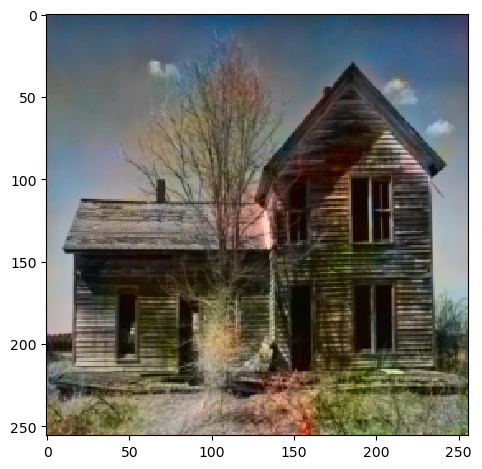

In [4]:

import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb


model = tf.keras.models.load_model('other_files/colorize_autoencoder_S1.model',
                                   custom_objects=None,
                                   compile=True)


img1_color=[]

img1=img_to_array(load_img('images/123.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave('images/result'+str("trying new1")+".jpg", lab2rgb(result))


In [6]:
model.save('final.h5');

1/1 [==============================] - 0s 176ms/step


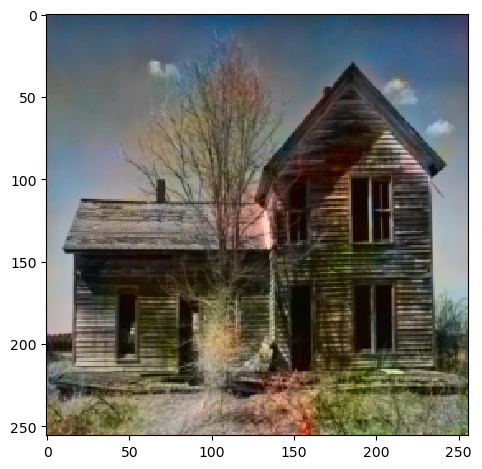

In [8]:

import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb


model = tf.keras.models.load_model('other_files/colorize_autoencoder_S1.model',
                                   custom_objects=None,
                                   compile=True)

img1_color=[]

img1=img_to_array(load_img('images/123.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave('images/result'+str("trying new1")+".jpg", lab2rgb(result))

In [ ]:

import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb


model = tf.keras.models.load_model('other_files/colorize_autoencoder_S2.model',
                                   custom_objects=None,
                                   compile=True)

img1_color=[]

img1=img_to_array(load_img('images/faceab.jfif'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave('images/result'+str("trying new1")+".jpg", lab2rgb(result))

1/1 [==============================] - 0s 372ms/step


In [ ]:

import tensorflow as tf
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb


model = tf.keras.models.load_model('other_files/colorize_autoencoder_S2.model',
                                   custom_objects=None,
                                   compile=True)

img1_color=[]

img1=img_to_array(load_img('images/faceab.jfif'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave('images/result'+str("trying new1")+".jpg", lab2rgb(result))

In [1]:
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import Graph, Session


ImportError: cannot import name 'Session' from 'tensorflow' (C:\Users\ECS\anaconda3\lib\site-packages\tensorflow\__init__.py)

In [ ]:
img_height=256
img_width=256


In [ ]:
testimg='images/faceab.jfif'

In [ ]:
img=image.load_img(testimg,target_size=(256,256))
img1=image.img_to_array(img)
img1_color = np.array(img1, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave('images/result'+str("trying new1")+".jpg", lab2rgb(result))
